# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2024s/tree/main/lectures) 
**See PrairieLearn for _due date_ and _submission instructions_**


Imports
------

In [1]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

## Instructions

_Points: 3_

Follow the [CPSC 330 homework submission instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md), and the summary at the end of this HW.


<br><br>

## Introducing the data set
 
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory. 

> You will not be able to push it to your repository (hopefully) because I have seeded the repository wich `.gitignore`.

<br><br>

## Exercise 1: Exploratory data analysis

### 1.1 Loading the data
_Points: 2_

**Your tasks:**

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column (index=0) of the .csv file should be set as the index.

<div class="alert alert-warning">

Solution_1.1
    
</div>

In [2]:
spotify_df = pd.read_csv("./data/spotify.csv", index_col = 0)

display(spotify_df)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


<br><br>

### 1.2 Number of training and test examples

_Points: 2_

**Your tasks:**

Run the following line of code to split the data. How many training and test examples do we have? Store them in variables `n_train_samples` and `n_test_samples`, respectively.  

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=321)




<div class="alert alert-warning">

Solution_1.2
    
</div>

In [4]:
n_train_samples = 1613
n_test_samples = 404
print(f"There are {n_train_samples} training examples and {n_test_samples} test examples" )

There are 1613 training examples and 404 test examples


<br><br>

#### 1.3

_Points: 3_

**Your tasks:**

1. Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
2. Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

> Note that `describe` returns another DataFrame.


<div class="alert alert-warning">

Solution_1.3
    
</div>

In [5]:
display(train_df.describe())


print("The feature with the smallest range is speechiness")

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000


The feature with the smallest range is speechiness


<br><br>

### 1.4 Plotting histograms 

_Points: 5_

The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using pandas plotting here. You can also use matplotlib if you wish. 

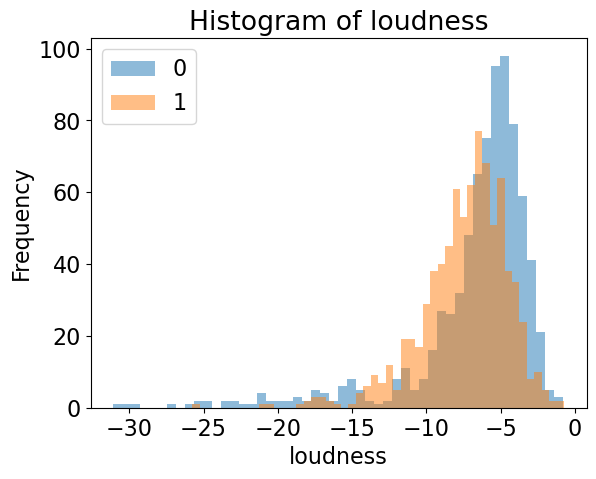

In [6]:
feat = "loudness"
ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_1.4
    
</div>

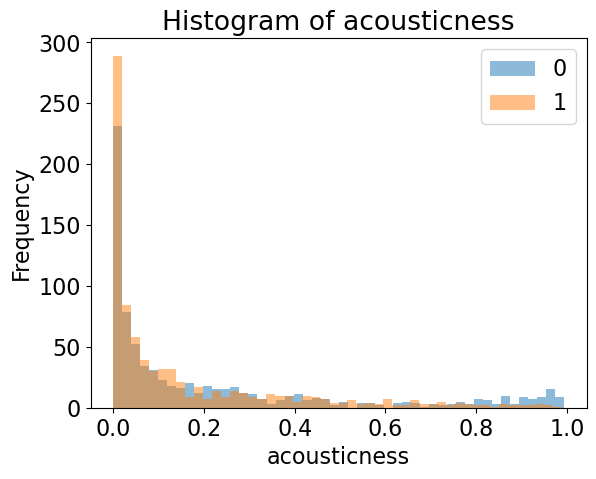

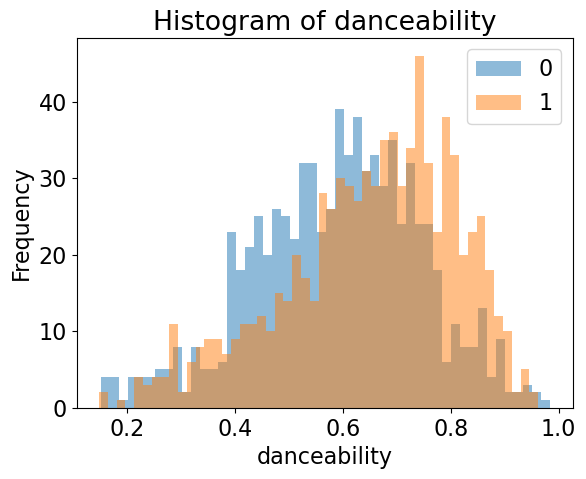

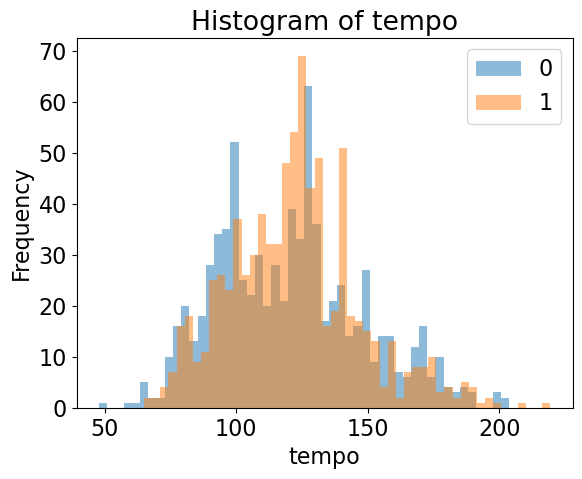

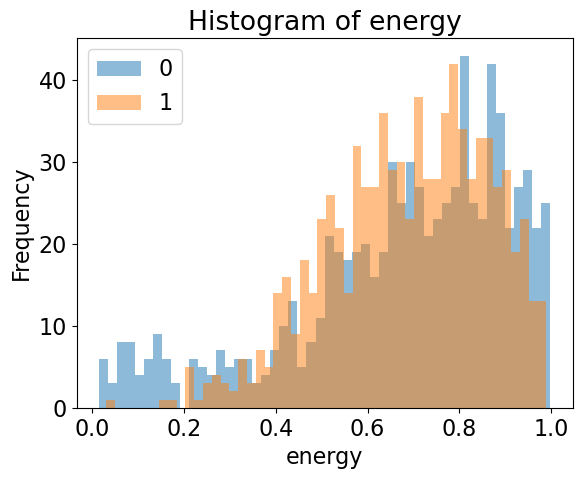

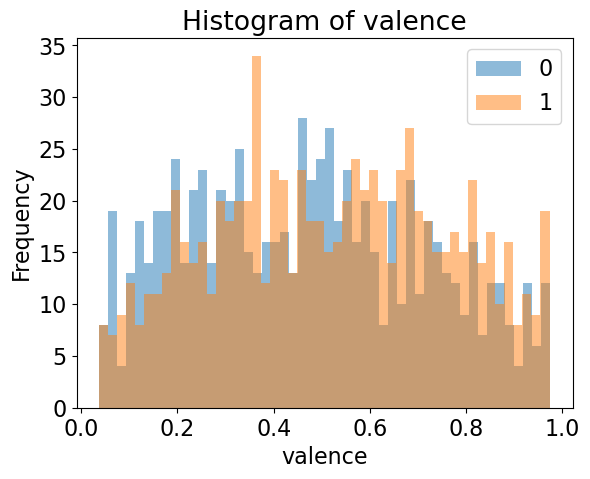

In [7]:
features = ["acousticness", "danceability", "tempo", "energy", "valence"]
for feat in features:
    ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

<br><br>

### 1.5 Identical histograms

_Points: 3_

**Your tasks:**

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

<div class="alert alert-warning">

Solution_1.5
    
</div>

Yes, the feature is not useful for predicting between the target class because as the distributions for the feature are the same between the two classes, it offers no information towards one target class or another.

<br><br>

### 1.6 Which columns to include? 

_Points: 4_

**Your tasks:**

Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? Would there be any difficulty in using them in your model?   

<div class="alert alert-warning">

Solution_1.6
    
</div>

Yes, this data could be useful because some artists are more popular and widely liked than others, and the song title has some bearing on a persons opinion of a song. However, as these features contain text data, it is hard to use this data in conjunction with numeric data. In the case of a Decision Tree, it is hard to "split" the data into branches.

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split. 

<br><br>

### 2.1

_Points 2_

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Skip the `song_title` and `artist` columns for now. 

<div class="alert alert-warning">

Solution_2.1
    
</div>

In [8]:
X_train = train_df.drop(columns=["target", "artist", "song_title"])
display(X_train)
y_train = train_df["target"]
display(y_train)

X_test = test_df.drop(columns=["target", "artist", "song_title"])
display(X_test)
y_test = test_df["target"]
display(y_test)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
260,0.018100,0.932,192773,0.819,0.000007,8,0.0577,-3.484,0,0.2030,119.941,4.0,0.552
1286,0.083900,0.459,256933,0.561,0.000000,7,0.0998,-7.091,1,0.0271,144.784,4.0,0.298
1344,0.001920,0.482,198947,0.968,0.000454,6,0.1080,-4.395,1,0.1490,114.001,4.0,0.245
1197,0.039000,0.673,229507,0.758,0.000000,7,0.3410,-3.632,1,0.1580,135.956,4.0,0.541
119,0.024400,0.746,222093,0.873,0.000000,7,0.3540,-3.803,1,0.1280,148.075,4.0,0.808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,0.003880,0.492,186867,0.797,0.000000,11,0.4660,-4.666,1,0.0388,79.513,4.0,0.533
799,0.062500,0.758,252333,0.629,0.000144,7,0.1090,-8.283,0,0.1060,112.575,3.0,0.260
124,0.674000,0.462,226333,0.449,0.000632,0,0.0993,-9.271,0,0.0916,209.686,4.0,0.748
538,0.000183,0.596,178800,0.628,0.007670,5,0.1870,-7.582,0,0.0503,139.965,4.0,0.520


260     1
1286    0
1344    0
1197    0
119     1
       ..
1833    0
799     1
124     1
538     1
1012    1
Name: target, Length: 1613, dtype: int64

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1489,0.570000,0.629,250173,0.572,0.000000,5,0.1920,-7.733,0,0.0387,100.015,4.0,0.380
1160,0.004110,0.624,207520,0.806,0.000000,1,0.0872,-5.957,1,0.0437,149.999,4.0,0.536
1407,0.947000,0.483,248176,0.199,0.000000,2,0.1090,-11.370,1,0.0586,78.103,4.0,0.162
579,0.151000,0.633,321627,0.850,0.000000,5,0.0556,-5.915,0,0.3440,97.933,4.0,0.761
1021,0.067700,0.587,180252,0.628,0.000002,1,0.1220,-5.703,1,0.0431,92.003,4.0,0.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.000467,0.817,213059,0.588,0.000002,7,0.0911,-6.603,1,0.0399,119.934,4.0,0.448
1915,0.161000,0.667,213000,0.728,0.000000,6,0.1990,-5.476,0,0.0272,99.014,4.0,0.449
824,0.391000,0.702,311892,0.495,0.800000,0,0.1120,-11.645,0,0.0493,78.507,4.0,0.292
28,0.051600,0.782,228562,0.572,0.000000,4,0.3300,-7.467,0,0.0385,120.021,4.0,0.237


1489    0
1160    0
1407    0
579     1
1021    0
       ..
204     1
1915    0
824     1
28      1
770     1
Name: target, Length: 404, dtype: int64

<br><br>

### 2.2

_Points: 2_

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.
2. Fit the the decision tree classifier. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

In [9]:
spotify_tree = DecisionTreeClassifier(random_state=123)
spotify_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

<br><br>

### 2.3 

_Points: 2_

**Your tasks**

1. Use the `predict` method to predict the class of the first example in your `X_train` and store the prediction in a variable called `pred` and compare it with the "true" class from `y_train`.   

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

<div class="alert alert-warning">

Solution_2.3
    
</div>

In [10]:
pred = spotify_tree.predict(X_train.iloc[[0]])
true_class = y_train.iloc[0]
print(f"The predicted class is {pred[0]} and the real class is {true_class}. These are the same.")

The predicted class is 1 and the real class is 1. These are the same.


<br><br>

### 2.4

_Points: 2_

**Your tasks:**

1. Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. Store the mean cross-validation accuracy in a variable called `mean_cv_score`.  


<div class="alert alert-warning">

Solution_2.4
    
</div>

In [11]:
model = DecisionTreeClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
mean_cv_score = cv_scores.mean()
print(f"The mean cross-validation accuracy is: {mean_cv_score}")

The mean cross-validation accuracy is: 0.6888007054673722


<br><br>

### 2.5

_Points: 3_

The above is useful, but we would like to see the training accuracy as well. 

**Your tasks:**

1. Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True` and save the results in a variable called `scores_df` as a pandas dataframe.  

<div class="alert alert-warning">

Solution_2.5
    
</div>

In [12]:
scores_df = pd.DataFrame(cross_validate(model, X_train, y_train, cv=10, return_train_score=True))
display(scores_df)

,fit_time,score_time,test_score,train_score
0,0.023032,0.001964,0.709877,0.999311
1,0.021035,0.001964,0.635802,0.998622
2,0.019000,0.001999,0.660494,0.999311
3,0.019006,0.002000,0.695652,0.998623
4,0.018999,0.002001,0.739130,0.998623
5,0.019038,0.001997,0.627329,0.998623
6,0.016999,0.002004,0.708075,0.998623
7,0.018085,0.003000,0.770186,0.999311
8,0.016963,0.002000,0.645963,0.999311
9,0.020001,0.002032,0.670807,0.998623


<br><br>

### 2.6

_Points: 2_

**Your tasks:**
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly discuss in 1 to 2 sentences.

<div class="alert alert-warning">

Solution_2.6
    
</div>

1. The cross-validation scores have high variability, which is quite inconsistent and indicative of a high standard deviation. Because of this variability, the mean cross-validation score is less trustworthy.
2. Yes, the training score is significantly better than the cross-validation scores. This suggests that the model is overfit to the training data.

<br><br><br><br>

## Exercise 3: Hyperparameters 

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

### 3.1

_Points: 10_

**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25). 
2. For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which. Store the plot in a variable called `max_depth_plot` for autograding. 


> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [13]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

<div class="alert alert-warning">

Solution_3.1
    
</div>

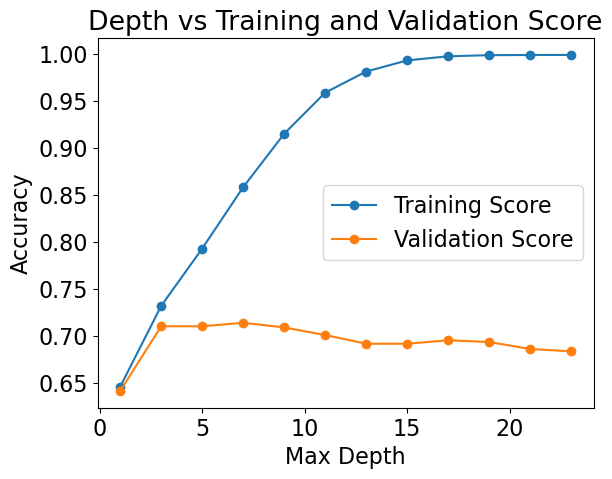

In [14]:
training_scores = []
validation_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth = depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    training_scores.append(np.mean(scores['train_score']))
    validation_scores.append((np.mean(scores['test_score'])))

max_depth_plot = plt.figure()
plt.plot(depths, training_scores, label='Training Score', marker='o')
plt.plot(depths, validation_scores, label='Validation Score', marker='o')
plt.title("Depth vs Training and Validation Score")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
    


<br><br>

### 3.2 `max_depth` and the fundamental tradeoff

_Points: 2_

**Your tasks:**

Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

<div class="alert alert-warning">

Solution_3.2
    
</div>

Increasing the max_depth hyperparameter greatly increases the model's training score. This suggests overfitting, as the error on predicting the training data is very low. The overfitting is also shown by the decreasing validation score as the max-depth grows too large. We can also see that a very small depth (1-3) is not desired, as both training and cross-validation accuracy is low indicating the model at low max depth is underfit.

<br><br>

### 3.3 Picking a reasonable value for `max_depth`

_Points: 2_

**Your tasks:**

From these results, what value for max_depth would you pick as the optimal value? Store it in the variable called `best_max_depth` below. 

<div class="alert alert-warning">

Solution_3.3
    
</div>

In [15]:
best_max_depth = 7

I chose a max depth of 7 because it has one of the highest validation acccuracy out of all the depths and not overfit.

<br><br>

### 3.4 Final assessment on the test set

_Points: 3_

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

**Your tasks:**
1. Train a decision tree classifier using the optimal _max_depth_ you chose in the previous exercise on the entire training set.
2. Compute and store it in a variable called `test_score`. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

In [16]:
best_model = DecisionTreeClassifier(max_depth = 7)
best_model.fit(X_train, y_train)
test_score =best_model.score(X_test, y_test)
print(f"The test score is {test_score}")

The test score is 0.6881188118811881


<br><br>

### 3.5 Analysis

_Points: 5_

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss.
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the max_depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_3.5
    
</div>

1. The test scores are similar to the cross-validation scores because cross-validation works in a similar way to the cross-validation method of splitting, training and then scoring on test data, but within the training set.
2. That would be overfitting, since the decision tree would just have the perfect depth to correctly predict any of the training data, it would be overfit to the training data and would not predict well on unseen new data.
3. Yes, because the score on the test data is indicative of the model with that max depths accuracy on unknown data, so other spotify datasets with the same format should have similar results with that max depth value.

<br><br><br><br>

## Exercise 4: Conceptual questions

_Points: 3_

Consider the dataset below, which has $6$ examples and $2$ features:

$$X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

<div class="alert alert-warning">

Solution_4
    
</div>

1. True = -1, False = +1
2. 5/6 right, so about 83.33% accurate
3. No.

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.